In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


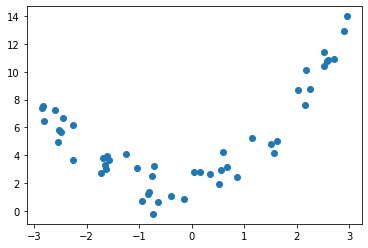

In [3]:
# generate data based on x^2+x+2
m = 50 # number of points
x = 6*np.random.rand(m,1)-3 # get numbers between 3 and -3
y = x**2 + x + 2 + np.random.randn(m,1)
plt.scatter(x,y)

# rand() uniform distribution on (0,1). Wouldn't be weighted
#randn() normal dist. Would be weighted towards middle


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
# train-test split
X_train,X_test,y_train,y_test = train_test_split(x,y)

In [6]:
# regression pipeline
pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('regressor', LinearRegression())
])


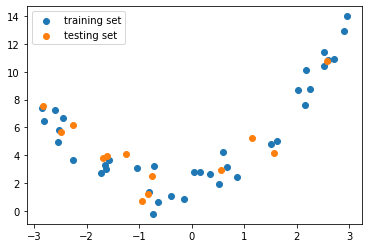

In [7]:
# plot traiing and testing set
plt.scatter(X_train,y_train,label='training set')
plt.scatter(X_test,y_test,label='testing set')
plt.legend()

In [8]:
# fit the pipeline to the training set
pipe.fit(X_train,y_train)
# make predictions
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

mse on training set: 0.7472697078920613
mse on testing set: 0.9934856835086502


(-1.0, 15.0)

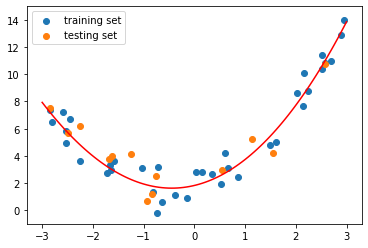

In [9]:
# plot traiing and testing set
plt.scatter(X_train,y_train,label='training set')
plt.scatter(X_test,y_test,label='testing set')
plt.legend()

# plot fitted model
m_plot = 100
x_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1) # m_plot rows, 1 column
y_plot = pipe.predict(x_plot)
plt.plot(x_plot,y_plot,color='red')

# compute mean squared error (MSE)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('mse on training set:', mse_train)
print('mse on testing set:', mse_test)

plt.ylim([-1,15])


In [10]:
pipe['regressor'].coef_

array([[-26.57443348,  30.71575193,   2.11302349]])

## Degrees from above
- degree 1 is underfitting, is a straight line
- degree 50 is overfitting.
- Large coefficients = overfitting

## Regularization
### Ridge Regression Minimize:
- Ridge Regression Minimize: Minimizes min squared error (MSE) and alpha. Penalizes big coefficients
- from above, alpha is a positive constant. 
- Typically has small coefficients


## Implement Ridge Regression

mse on training set: 1.1242841430940747
mse on testing set: 1.412504529638539


(-1.0, 15.0)

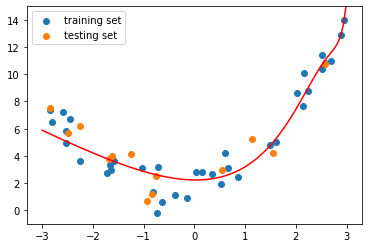

In [11]:
from sklearn.linear_model import Ridge

# regression pipeline
pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=50, include_bias=False)),
    ('regressor', Ridge(alpha=0.1))
])

# fit the pipeline to the training set
pipe.fit(X_train,y_train)
# make predictions
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# plot traiing and testing set
plt.scatter(X_train,y_train,label='training set')
plt.scatter(X_test,y_test,label='testing set')
plt.legend()

# plot fitted model
m_plot = 100
x_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1) # m_plot rows, 1 column
y_plot = pipe.predict(x_plot)
plt.plot(x_plot,y_plot,color='red')

# compute mean squared error (MSE)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('mse on training set:', mse_train)
print('mse on testing set:', mse_test)

plt.ylim([-1,15])


In [12]:
# coefficients
pipe['regressor'].coef_
# prints out: 
# theta0, theta1X, theta2X^2, 

array([[-10.00813167,   2.02216889,   4.90986934,   4.784508  ,
          3.90041147,   2.95349806,   2.13048453,   1.45935505,
          0.92394745,   0.50019122,   0.16633967,  -0.09509948,
         -0.29778304,  -0.45239194,  -0.56739451,  -0.6496164 ,
         -0.70464284,  -0.73709952,  -0.75085143,  -0.74914745,
         -0.73472887,  -0.70991354,  -0.67666297,  -0.63663698,
         -0.59123913,  -0.54165471,  -0.48888301,  -0.43376463,
         -0.37700488,  -0.31919373,  -0.26082284,  -0.20230021,
         -0.14396264,  -0.08608647,  -0.02889667,   0.02742534,
          0.08273495,   0.13691875,   0.18988957,   0.24158239,
          0.29195076,   0.34096381,   0.38860366,   0.43486323,
          0.47974436,   0.52325628,   0.56541422,   0.60623828,
          0.64575246,   0.68398387]])

## Lasso Regression

mse on training set: 1.3750177568499677
mse on testing set: 1.558371352319863


(-1.0, 15.0)

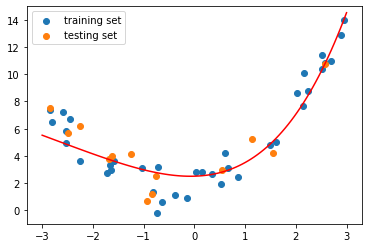

In [13]:
from sklearn.linear_model import Lasso

# regression pipeline
pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=50, include_bias=False)),
    ('regressor', Lasso(alpha=0.03))
])

# fit the pipeline to the training set
pipe.fit(X_train,y_train)
# make predictions
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# plot traiing and testing set
plt.scatter(X_train,y_train,label='training set')
plt.scatter(X_test,y_test,label='testing set')
plt.legend()

# plot fitted model
m_plot = 100
x_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1) # m_plot rows, 1 column
y_plot = pipe.predict(x_plot)
plt.plot(x_plot,y_plot,color='red')

# compute mean squared error (MSE)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('mse on training set:', mse_train)
print('mse on testing set:', mse_test)

plt.ylim([-1,15])


In [14]:
# in Lasso most coefficients are zero
pipe['regressor'].coef_

array([-8.05490064,  0.        ,  2.97520443, 13.75833827,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

## Two plots
- going to plot training mse
- and testing mse
-
- Typically, a low degree is underfitting and a high degree is overfitting.
- Underfitting = high error
- Overfiting = low error
- Goal is to choose the degree at the closest point between training MSE and testing MSE

In [15]:
# regression pipeline
pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=50, include_bias=False)),
    ('regressor', Ridge(alpha=0)) # linear regression
])


In [16]:
# Accessing the degree
pipe['poly_features'].degree

50

In [17]:
mse_train = []
mse_test = []

for degree in range(1,51):
    # set degrees, fit data
    pipe['poly_features'].degree = degree
    pipe.fit(X_train,y_train)
    # generate prediction data
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    #
    mse_train.append(mean_squared_error(y_train,y_train_pred))
    mse_test.append(mean_squared_error(y_test,y_test_pred))

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.40599e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\

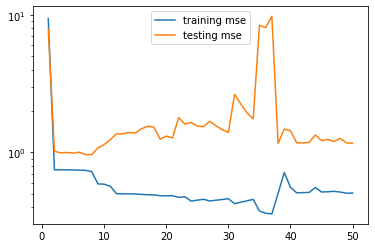

In [20]:
plt.semilogy(range(1,51), mse_train,label='training mse')
plt.semilogy(range(1,51), mse_test,label='testing mse')
plt.legend()

In [24]:
pipe['poly_features'].degree = 50
alpha_list = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000]
mse_train = []
mse_test = []

for alpha in alpha_list:
    # set alpha, make prdictions
    pipe['regressor'].alpha = alpha
    pipe.fit(X_train,y_train)
    # generate prediction data
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    #
    mse_train.append(mean_squared_error(y_train,y_train_pred))
    mse_test.append(mean_squared_error(y_test,y_test_pred))

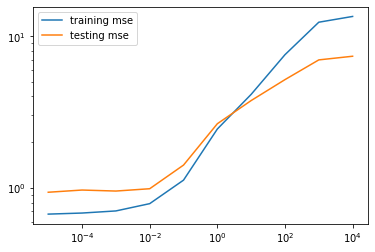

In [25]:
plt.loglog(alpha_list, mse_train, label='training mse')
plt.loglog(alpha_list, mse_test, label='testing mse')
plt.legend()